<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Line Charts**


Estimated time needed: **30** minutes


In this lab, you will focus on using line charts to analyze trends over time and across different categories in a dataset.



## Objectives


In this lab you will perform the following:


- Track trends in compensation across age groups and specific age ranges.

- Analyze job satisfaction trends based on experience level.

- Explore and interpret line charts to identify patterns and trends.


## Setup: Working with the Database
**Install the needed libraries**


In [ ]:
!pip install pandas


In [ ]:
!pip install matplotlib

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



#### Step 1: Download the dataset


In [1]:
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv


--2026-01-02 00:30:40--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  30.6MB/s    in 5.4s    

2026-01-02 00:30:46 (28.0 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



#### Step 2: Import necessary libraries and load the dataset


In [2]:
import pandas as pd
import matplotlib.pyplot as plt


#### Load the data


In [3]:
df = pd.read_csv("survey-data.csv")


#### Display the first few rows to understand the structure of the data


In [ ]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load CSV (Lab 20 uses survey-data.csv)
df = pd.read_csv("survey-data.csv")

def to_num(s):
    return pd.to_numeric(s, errors="coerce")

def parse_years(x):
    """Convert experience strings to numeric years."""
    if pd.isna(x):
        return np.nan
    if isinstance(x, str):
        t = x.strip().lower()
        if t.startswith("less"):   # "Less than 1 year"
            return 0.5
        if t.startswith("more"):   # "More than 50 years"
            return 51.0
        if t in ["none", "nan"]:
            return np.nan
    return pd.to_numeric(x, errors="coerce")

def parse_age_mid(age):
    """Convert age bins to a numeric midpoint for filtering ranges like 25–45."""
    if pd.isna(age):
        return np.nan
    s = str(age)
    m = pd.Series([s]).str.extract(r"(\d+)\s*-\s*(\d+)").astype(float)
    if not m.isna().all(axis=None):
        return float(m.mean(axis=1).iloc[0])
    if "Under" in s:
        return 16.0
    if "or older" in s:
        return 70.0
    return np.nan

AGE_ORDER = [
    "Under 18 years old",
    "18-24 years old",
    "25-34 years old",
    "35-44 years old",
    "45-54 years old",
    "55-64 years old",
    "65 years or older",
    "Prefer not to say"
]

def order_age_index(idx):
    return [a for a in AGE_ORDER if a in idx]

# ---- Build cleaned dfc once ----
dfc = df.copy()

# Age helpers
dfc["AgeNum"] = dfc["Age"].apply(parse_age_mid) if "Age" in dfc.columns else np.nan

# Compensation numeric + cap extreme values (prevents scale/line issues)
dfc["ConvertedCompYearly_num"] = to_num(dfc.get("ConvertedCompYearly"))
dfc.loc[(dfc["ConvertedCompYearly_num"] <= 0) | (dfc["ConvertedCompYearly_num"] > 5_000_000), "ConvertedCompYearly_num"] = np.nan

# Job satisfaction numeric
dfc["JobSatPoints_6_num"] = to_num(dfc.get("JobSatPoints_6"))

# Experience: choose best available column
# Prefer WorkExp (if exists), otherwise YearsCodePro, otherwise YearsCode
exp_col = None
for c in ["WorkExp", "YearsCodePro", "YearsCode"]:
    if c in dfc.columns:
        exp_col = c
        break

if exp_col is None:
    print("WARNING: No experience column found (WorkExp / YearsCodePro / YearsCode).")
    dfc["ExpYears"] = np.nan
else:
    dfc["ExpYears"] = dfc[exp_col].apply(parse_years)

print("Using experience column:", exp_col)
print(dfc[["ConvertedCompYearly_num","JobSatPoints_6_num","AgeNum","ExpYears"]].notna().sum())


Using experience column: WorkExp
ConvertedCompYearly_num    23431
JobSatPoints_6_num         29450
AgeNum                     65115
ExpYears                   29658
dtype: int64


In [5]:
def verify(d, cols, label=""):
    print(f"\n--- VERIFY {label} ---")
    missing = [c for c in cols if c not in d.columns]
    if missing:
        raise KeyError(f"Missing columns: {missing}")
    print("Non-null counts:\n", d[cols].notna().sum())
    d2 = d.dropna(subset=cols)
    print("Rows after dropna:", len(d2))
    return d2


### Task 1: Trends in Compensation Over Age Groups


##### 1. Line Chart of Median `ConvertedCompYearly` by Age Group


- Track how the median yearly compensation (ConvertedCompYearly) changes across different age groups.

- Use a line chart to visualize these trends.



--- VERIFY Task 1.1 ---
Non-null counts:
 Age                        65437
ConvertedCompYearly_num    23431
dtype: int64
Rows after dropna: 23431


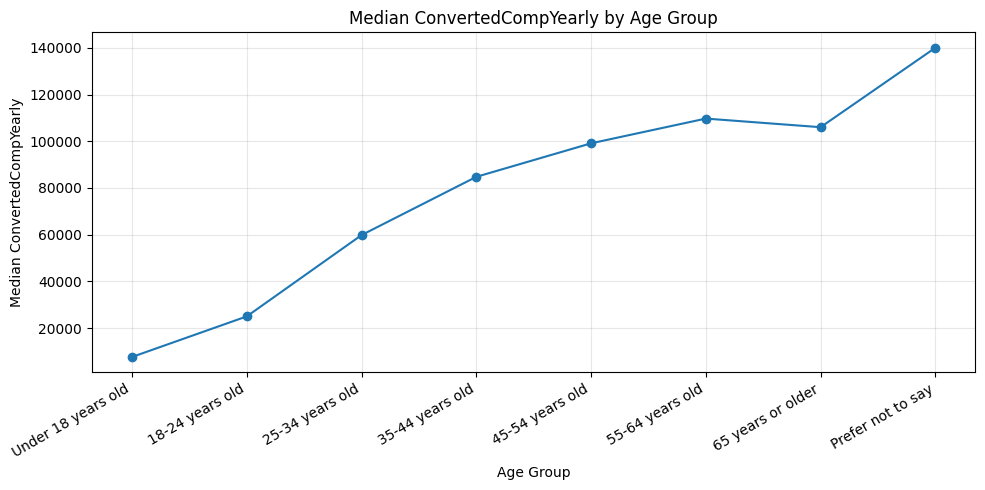

Age
Under 18 years old      7626.5
18-24 years old        25000.0
25-34 years old        59817.0
35-44 years old        84747.0
45-54 years old        99099.0
55-64 years old       109691.0
65 years or older     106000.0
Prefer not to say     140000.0
Name: ConvertedCompYearly_num, dtype: float64


In [6]:
d = verify(dfc, ["Age", "ConvertedCompYearly_num"], "Task 1.1")

med_by_age = d.groupby("Age")["ConvertedCompYearly_num"].median()
med_by_age = med_by_age.reindex(order_age_index(med_by_age.index))

plt.figure(figsize=(10,5))
plt.plot(med_by_age.index, med_by_age.values, marker="o")
plt.title("Median ConvertedCompYearly by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Median ConvertedCompYearly")
plt.xticks(rotation=30, ha="right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print(med_by_age)


##### 2. Line Chart of Median `ConvertedCompYearly` for Ages 25 to 45


For a closer look, plot a line chart focusing on the median compensation for respondents between ages 25 and 45.



--- VERIFY Task 1.2 ---
Non-null counts:
 AgeNum                     65115
ConvertedCompYearly_num    23431
Age                        65437
dtype: int64
Rows after dropna: 23422
Rows in 25–45 range: 16597


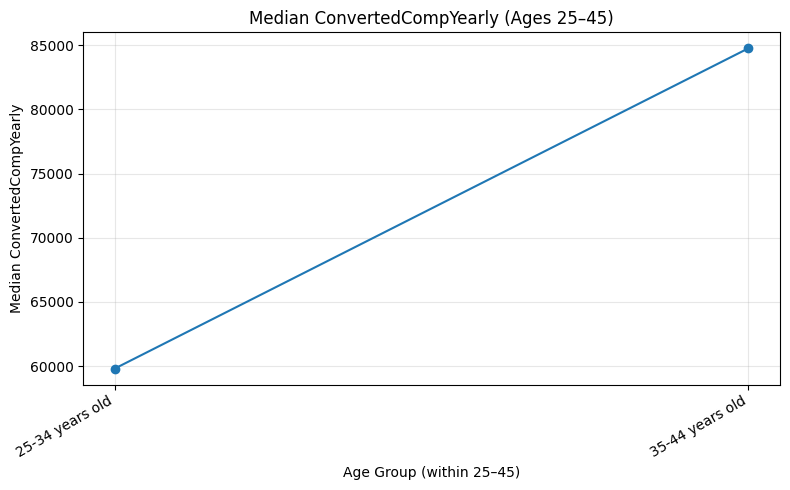

Age
25-34 years old    59817.0
35-44 years old    84747.0
Name: ConvertedCompYearly_num, dtype: float64


In [7]:
d = verify(dfc, ["AgeNum", "ConvertedCompYearly_num", "Age"], "Task 1.2")

d_2545 = d[(d["AgeNum"] >= 25) & (d["AgeNum"] <= 45)].copy()
print("Rows in 25–45 range:", len(d_2545))

med_2545 = d_2545.groupby("Age")["ConvertedCompYearly_num"].median()
med_2545 = med_2545.reindex(order_age_index(med_2545.index))

plt.figure(figsize=(8,5))
plt.plot(med_2545.index, med_2545.values, marker="o")
plt.title("Median ConvertedCompYearly (Ages 25–45)")
plt.xlabel("Age Group (within 25–45)")
plt.ylabel("Median ConvertedCompYearly")
plt.xticks(rotation=30, ha="right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print(med_2545)


### Task 2: Trends in Job Satisfaction by Experience Level



##### 1. Line Chart of Job Satisfaction (`JobSatPoints_6`) by Experience Level



- Use a column that approximates experience level to analyze how job satisfaction changes with experience.

- If needed, substitute an available experience-related column for `Experience`.



--- VERIFY Task 2.1 ---
Non-null counts:
 ExpYears              29658
JobSatPoints_6_num    29450
dtype: int64
Rows after dropna: 29248


/tmp/ipython-input-1436765625.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d["ExpBin"] = pd.cut(d["ExpYears"], bins=bins, labels=labels, right=False, include_lowest=True)
/tmp/ipython-input-1436765625.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  med_sat = d.groupby("ExpBin")["JobSatPoints_6_num"].median()


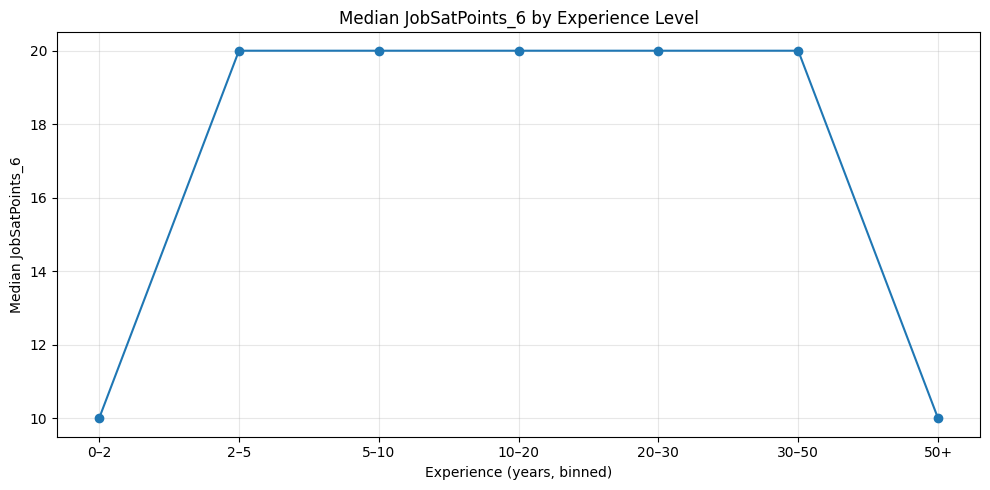

ExpBin
0–2      10.0
2–5      20.0
5–10     20.0
10–20    20.0
20–30    20.0
30–50    20.0
50+      10.0
Name: JobSatPoints_6_num, dtype: float64


In [8]:
d = verify(dfc, ["ExpYears", "JobSatPoints_6_num"], "Task 2.1")

# Create experience bins
bins = [0, 2, 5, 10, 20, 30, 50, 100]
labels = ["0–2", "2–5", "5–10", "10–20", "20–30", "30–50", "50+"]

d["ExpBin"] = pd.cut(d["ExpYears"], bins=bins, labels=labels, right=False, include_lowest=True)

med_sat = d.groupby("ExpBin")["JobSatPoints_6_num"].median()

plt.figure(figsize=(10,5))
plt.plot(med_sat.index.astype(str), med_sat.values, marker="o")
plt.title("Median JobSatPoints_6 by Experience Level")
plt.xlabel("Experience (years, binned)")
plt.ylabel("Median JobSatPoints_6")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print(med_sat)


### Task 3: Trends in Job Satisfaction and Compensation by Experience


##### 1.Line Chart of Median ConvertedCompYearly Over Experience Level

- This line chart will track how median compensation (`ConvertedCompYearly`) changes with increasing experience.

- Use a column such as `WorkExp` or another relevant experience-related column.



--- VERIFY Task 3.1 ---
Non-null counts:
 ExpYears                   29658
ConvertedCompYearly_num    23431
dtype: int64
Rows after dropna: 16141


/tmp/ipython-input-592389901.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d["ExpBin"] = pd.cut(d["ExpYears"], bins=bins, labels=labels, right=False, include_lowest=True)
/tmp/ipython-input-592389901.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  med_comp = d.groupby("ExpBin")["ConvertedCompYearly_num"].median()


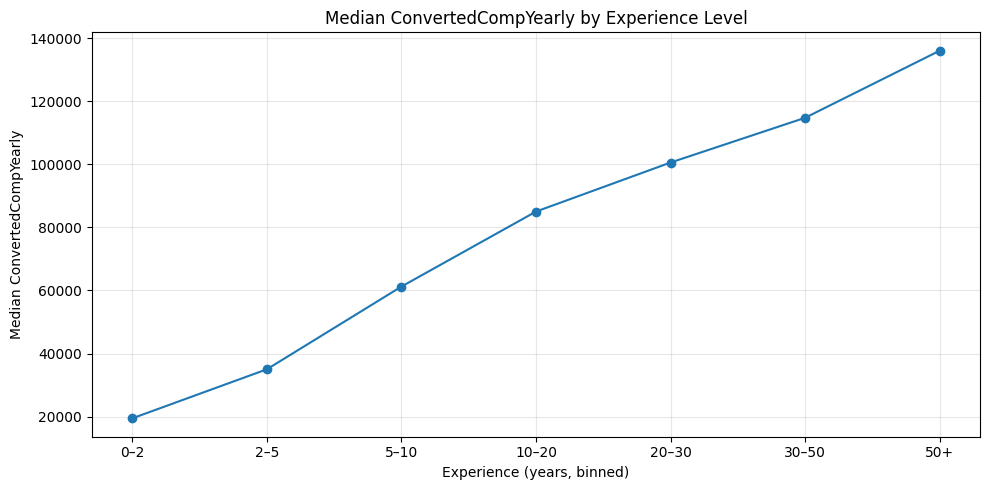

ExpBin
0–2       19457.0
2–5       35000.0
5–10      61222.0
10–20     85000.0
20–30    100549.0
30–50    114730.5
50+      136000.0
Name: ConvertedCompYearly_num, dtype: float64


In [9]:
d = verify(dfc, ["ExpYears", "ConvertedCompYearly_num"], "Task 3.1")

bins = [0, 2, 5, 10, 20, 30, 50, 100]
labels = ["0–2", "2–5", "5–10", "10–20", "20–30", "30–50", "50+"]

d["ExpBin"] = pd.cut(d["ExpYears"], bins=bins, labels=labels, right=False, include_lowest=True)

med_comp = d.groupby("ExpBin")["ConvertedCompYearly_num"].median()

plt.figure(figsize=(10,5))
plt.plot(med_comp.index.astype(str), med_comp.values, marker="o")
plt.title("Median ConvertedCompYearly by Experience Level")
plt.xlabel("Experience (years, binned)")
plt.ylabel("Median ConvertedCompYearly")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print(med_comp)


##### 2.Line Chart of Job Satisfaction (`JobSatPoints_6`) Across Experience Levels

- Create a line chart to explore trends in job satisfaction (`JobSatPoints_6`) based on experience level.

- This chart will provide insight into how satisfaction correlates with experience over time



--- VERIFY Task 3.2 ---
Non-null counts:
 ExpYears              29658
JobSatPoints_6_num    29450
dtype: int64
Rows after dropna: 29248


/tmp/ipython-input-512781292.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d["ExpBin"] = pd.cut(d["ExpYears"], bins=bins, labels=labels, right=False, include_lowest=True)
/tmp/ipython-input-512781292.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  med_sat = d.groupby("ExpBin")["JobSatPoints_6_num"].median()


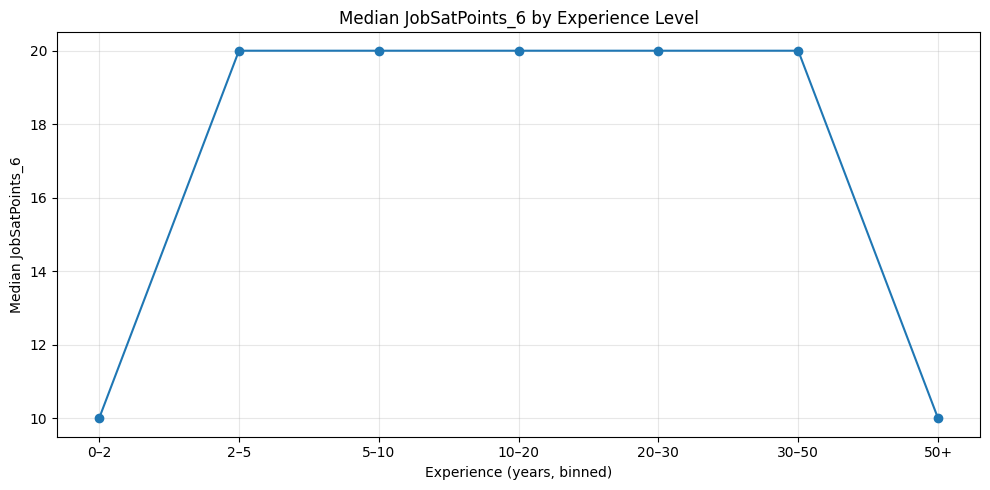

ExpBin
0–2      10.0
2–5      20.0
5–10     20.0
10–20    20.0
20–30    20.0
30–50    20.0
50+      10.0
Name: JobSatPoints_6_num, dtype: float64


In [10]:
d = verify(dfc, ["ExpYears", "JobSatPoints_6_num"], "Task 3.2")

bins = [0, 2, 5, 10, 20, 30, 50, 100]
labels = ["0–2", "2–5", "5–10", "10–20", "20–30", "30–50", "50+"]

d["ExpBin"] = pd.cut(d["ExpYears"], bins=bins, labels=labels, right=False, include_lowest=True)

med_sat = d.groupby("ExpBin")["JobSatPoints_6_num"].median()

plt.figure(figsize=(10,5))
plt.plot(med_sat.index.astype(str), med_sat.values, marker="o")
plt.title("Median JobSatPoints_6 by Experience Level")
plt.xlabel("Experience (years, binned)")
plt.ylabel("Median JobSatPoints_6")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print(med_sat)


#### Final Step: Review


In this lab, you focused on analyzing trends in compensation and job satisfaction, specifically exploring how these metrics change with age and experience levels using line charts.


### Summary


In this lab, you explored essential data visualization techniques with a focus on analyzing trends using line charts. You learned to:

- Visualize the distribution of compensation across age groups to understand salary trends.

- Track changes in median compensation over various experience levels, identifying how earnings progress with experience.

- Examine trends in job satisfaction by experience, revealing how satisfaction varies throughout a developer's career.

These analyses allow for a deeper understanding of how factors like age and experience influence job satisfaction and compensation. By using line charts, you gained insights into continuous data patterns, which are invaluable for interpreting professional trends in the developer community.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
